# Working with the Pneumonia dataset

This is an exploration into the Pneumonia data set on kaggle: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

## Stucture of current directory


- The current directory has a directory called "chest_xray"

- Inside chest_xray there is a train, test and validation directory.

- Inside each of these directory's are directories called "NORMAL" and "PNEUMONIA"

- Inside any "NORMAL" or "PNEUMONIA" directory are jpeg files

- Note: inside the PNEUMONIA directory, we can see that there are two types of pneumonia: virus and bacteria.

For my first models I will not differentiate these but looking to classify these seperately is an interesting extension.


In [3]:
# importing some packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 

Now, I will do some exploration of the data, get counts of each of the data types

In [4]:

# CHANGE depending on your local machine
# os.chdir("/mnt/d/WSL/COMP9417/pneumonia")


base_dir = 'chest_xray/'

train_dir = base_dir + 'train/'
test_dir = base_dir + 'test/'
val_dir = base_dir + 'val/'

train_neg = train_dir + 'NORMAL'
train_pos = train_dir + 'PNEUMONIA'
test_neg = test_dir + 'NORMAL'
test_pos = test_dir + 'PNEUMONIA'
val_neg = val_dir + 'NORMAL'
val_pos = val_dir + 'PNEUMONIA'

train_pos = [train_pos+'/'+i  for i in os.listdir(train_pos) ]
train_neg = [train_neg + '/' + i for i in os.listdir(train_neg) ]


test_pos = [test_pos + '/' + i for i in os.listdir(test_pos) ]
test_neg = [test_neg + '/' + i for i in os.listdir(test_neg)]

val_pos = [val_pos + '/' + i for i in os.listdir(val_pos)]
val_neg = [val_neg + '/' + i for i in os.listdir(val_neg)]
print(len(train_pos))


3875


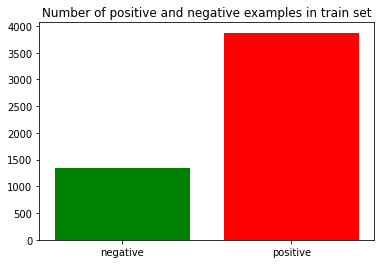

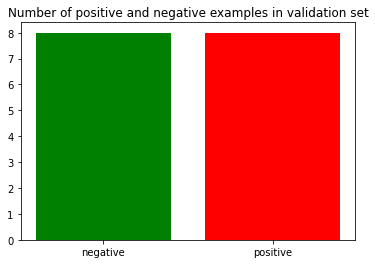

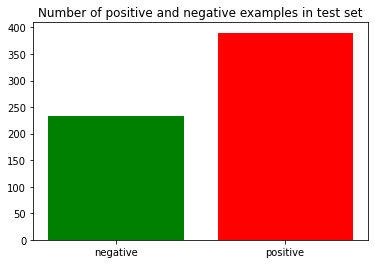

0.7429064417177914


In [5]:
# plot number of positive and negative examples:

fig = plt.figure()

plt.bar("negative", len(train_neg),  color = 'g')
plt.bar("positive", len(train_pos), color = "r")
plt.title("Number of positive and negative examples in train set")
plt.show()


fig = plt.figure()

plt.bar("negative", len(val_neg),  color = 'g')
plt.bar("positive", len(val_pos), color = "r")
plt.title("Number of positive and negative examples in validation set")
plt.show()


fig = plt.figure()

plt.bar("negative", len(test_neg),  color = 'g')
plt.bar("positive", len(test_pos), color = "r")
plt.title("Number of positive and negative examples in test set")
plt.show()

print(len(train_pos)/ (len(train_neg) + len(train_pos)))

We can see that there are many more positive examples than negative examples in our data, perhaps in our proposed models, we should add weights to counter this inbalance.

There are not enough samples in the validation set, one option is to combine all the samples and make our own train and test set, rather than use the given split. For now, I will use the given splits.

Below I will fit a logistic regression, going to reduce the image via greyscale and reduce the dimensions of the image to 127 by 127 pixels as this is the lowest dimension of the images. Probably not going to be the best model but should be a good baseline.


In [7]:

train_full = train_pos + train_neg

# resizing images

# size of smallest image()
image_size = 127

# there are a few packages for image reading, here im using cv2

widths_train = []
heights_train = []

train_data = []
train_labels = []

count = 0
for train_img in train_full:
    img = cv2.imread(train_img, cv2.IMREAD_GRAYSCALE)
    
    widths_train.append(img.shape[0])
    heights_train.append(img.shape[1])
    
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    
    train_data.append(np_img)
    
    if "bacteria" in train_img or "virus" in train_img:
        train_labels.append(1)
    else:
        train_labels.append(0)

    if count % 750 == 0:
        print(f"{count} images processed")
    count += 1



print(sum(train_labels))


print(f"min width is {min(widths_train)}")
print(f"min heights is {min(heights_train)}")

0 images processed
750 images processed
1500 images processed
2250 images processed
3000 images processed
3750 images processed
4500 images processed
3875
min width is 127
min heights is 384


In [8]:
# printing lowest 10 image height and widths

print(sorted(widths_train)[:10])
print(sorted(heights_train)[:10])

[127, 132, 138, 140, 144, 151, 156, 157, 163, 164]
[384, 399, 400, 407, 415, 428, 428, 437, 438, 438]


In [9]:
test_data = []
test_labels = []

test_full = test_neg + test_pos


widths = []
heights = []

count = 0
for test_img in test_full:
    img = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)
    widths.append(img.shape[0])
    heights.append(img.shape[1])
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    test_data.append(np_img)
    if "bacteria" in test_img or "virus" in test_img:
        test_labels.append(1)
    else:
        test_labels.append(0)

    if count % 100 == 0:
        print(f"{count} images processed")
    count += 1
    
print(sum(test_labels))


print(f"min width is {min(widths)}")
print(f"min heights is {min(heights)}")


0 images processed
100 images processed
200 images processed
300 images processed
400 images processed
500 images processed
600 images processed
390
min width is 344
min heights is 728


In [10]:
from sklearn.linear_model import LogisticRegression

# convert to np arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)


test_data = np.array(test_data)
test_labels = np.array(test_labels)

logisticRegr = LogisticRegression()
logisticRegr.fit(train_data , train_labels)

score = logisticRegr.score(train_data, train_labels)
print(f"train score = {score}")

test_score = logisticRegr.score(test_data, test_labels)
print(f"test score = {test_score}")


/home/nasser/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


train score = 1.0
test score = 0.7339743589743589


The train accuracy is very good which is to be expected but the test score is very bad.

The test accuracy, however, is very poor, this is can be seen by a "model" which only predicts positive outcomes, their test accuracy would be:

(positive cases)/ (total cases) = 0.7429064417177914, so this would perform better according to this accuracy score.

In [11]:
from sklearn import metrics


predictions = logisticRegr.predict(test_data)
cm = metrics.confusion_matrix(test_labels, predictions)
print(cm)


[[ 73 161]
 [  5 385]]


The confusion matrix tells us that we have 73 true negatives, 6 false negative, 161 false positives and 384 true positives

TODO: More graphs and extend on the logistic regression model (different solvers, score functions, prepocessing, adding weights etc)